 <a name="topo"></a>

## Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

## Problema: O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)

Nesta etapa, é possível compreender e analisar os dados,de forma intuitiva. Além disso, entender a relação dos parâmetros, procurar e encontrar tendências/padrões entre diferentes parâmetros.

<br>

[início](#topo)

### Importação das bibliotecas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Leitura da base de treino e teste 

In [4]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### Definir o Id do Passageiro como Index

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.set_index('PassengerId', inplace=True)

In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.set_index('PassengerId', inplace=True)

In [9]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Verificação do shape de Id Passageiro e do Index

In [10]:
train.shape, test.shape

((891, 11), (418, 10))

In [11]:
data = pd.concat([train, test], sort=True)

### Tradução das colunas

In [12]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [13]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

In [14]:
data.columns

Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaosConjuge', 'Sobreviveu', 'Bilhete'],
      dtype='object')

 <a name="mapsex"></a>

### Mapeamento da coluna Sexo para "homem" e "mulher"

In [15]:
data['Sexo']

PassengerId
1         male
2       female
3       female
4       female
5         male
6         male
7         male
8         male
9       female
10      female
11      female
12      female
13        male
14        male
15      female
16      female
17        male
18        male
19      female
20      female
21        male
22        male
23      female
24        male
25      female
26      female
27        male
28        male
29      female
30        male
         ...  
1280      male
1281      male
1282      male
1283    female
1284      male
1285      male
1286      male
1287    female
1288      male
1289    female
1290      male
1291      male
1292    female
1293      male
1294    female
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301    female
1302    female
1303    female
1304    female
1305      male
1306    female
1307      male
1308      male
1309      male
Name: Sexo, Length: 1309, dtype: object

In [16]:
sexo = {'male' : 'homem', 'female' : 'mulher'}

 <a name="portembarque"></a>

In [17]:
data['Sexo'] = data['Sexo'].map(sexo)

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Idade            1046 non-null float64
Cabine           295 non-null object
Embarque         1307 non-null object
Tarifa           1308 non-null float64
Nome             1309 non-null object
PaisFilhos       1309 non-null int64
Classe           1309 non-null int64
Sexo             1309 non-null object
IrmaosConjuge    1309 non-null int64
Sobreviveu       891 non-null float64
Bilhete          1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [19]:
# Sexo, Embarque, Sobreviveu

 <a name="ord"></a>

* ### Ordinais

In [20]:
# Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [21]:
# Idade, Tarifa

 <a name="disc"></a>

* ### Discretos

In [22]:
# PaisFilhos, IrmaosConjuge

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [23]:
# Bilhete

 <a name="missing"></a>

### Tratamento de dados incompletos 

In [24]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preenchimento da coluna Embarque, utilizando a moda

In [25]:
moda_embarque = data['Embarque'].mode()[0]
moda_embarque

'S'

In [26]:
data['Embarque'].fillna(moda_embarque, inplace=True)

In [27]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            0
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

### Informações Gerais (Parâmetros Numéricos)

In [28]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [29]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [30]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [31]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [32]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [33]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

## Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [34]:
data[['Classe','Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [35]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [36]:
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [37]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

Text(0, 0.5, '')

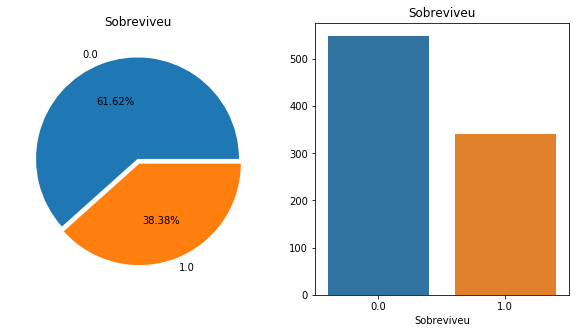

In [38]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu',data=data,ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')


## Sobrevivência Por Sexo

In [39]:
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [40]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

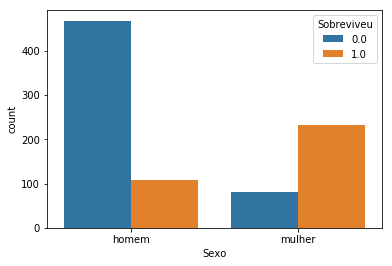

In [41]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

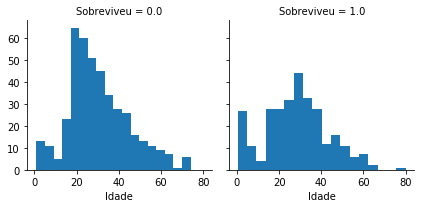

In [42]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

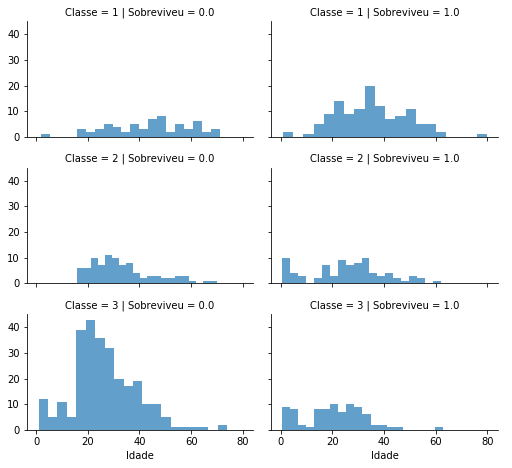

In [43]:
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade',alpha=0.7, bins=20)
grid.add_legend();

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

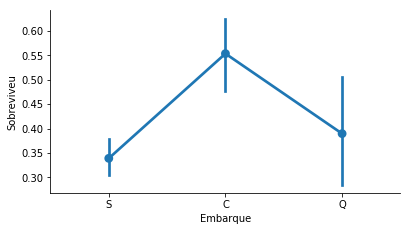

In [44]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

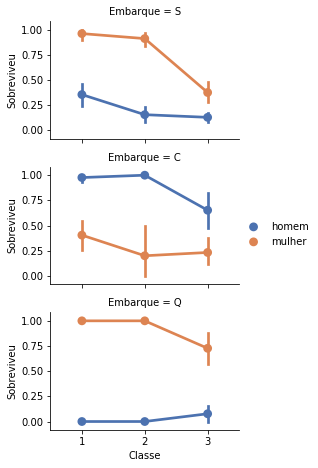

In [45]:
grid = sns.FacetGrid(data, row='Embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

### Agrupar mulheres por sobrevivência

In [46]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [47]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

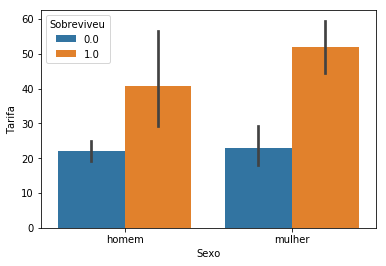

In [48]:
sns.barplot('Sexo', 'Tarifa', hue='Sobreviveu', data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

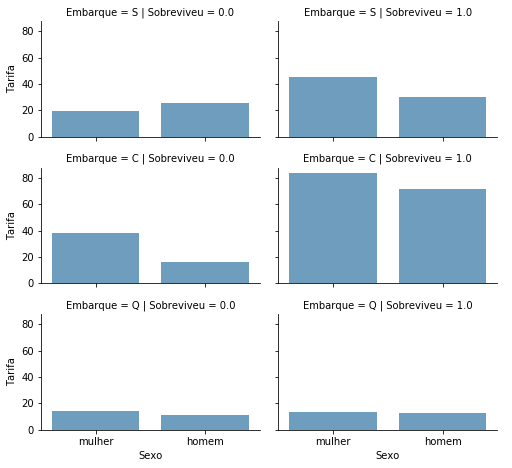

In [49]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [50]:
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

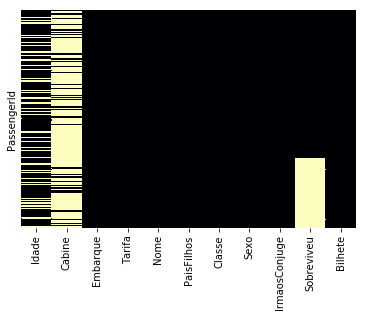

In [51]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### Remover Cabine

In [52]:
data.drop(['Cabine'], axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

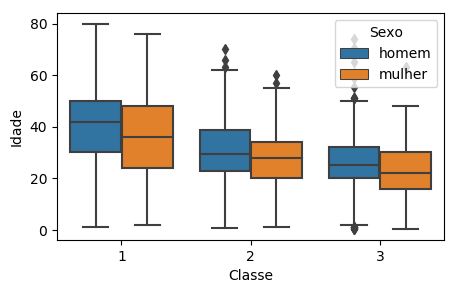

In [53]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [54]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [55]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [56]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [57]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [58]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [59]:
data.loc[data['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmaosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

In [60]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [61]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [62]:
['Braund',  'Mr. Owen Harris'][0]

'Braund'

### Criar Feature Sobrenome da Família

In [63]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [64]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Sage             11
Andersson        11
Asplund           8
Goodwin           8
Davies            7
Fortune           6
Ford              6
Smith             6
Panula            6
Skoog             6
Brown             6
Carter            6
Rice              6
Johnson           6
Palsson           5
Williams          5
Ryerson           5
Thomas            5
Lefebre           5
Kelly             5
Dean              4
West              4
Hocking           4
Olsen             4
Vander Planke     4
Ware              4
Becker            4
Laroche           4
Goldsmith         4
Gustafsson        4
                 ..
Meek              1
Meanwell          1
McNeill           1
McMahon           1
McKane            1
McGovern          1
Moen              1
Molson            1
Montvila          1
Moraweck          1
Nesson            1
Nenkoff           1
Naughton          1
Natsch            1
Nasr              1
Nankoff           1
Nancarrow         1
Najib             1
Naidenoff 

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [65]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


### Mulheres e Crianças da Família "Sage"

In [66]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [67]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [68]:
MulherOuCrianca = data.loc[(data['Sexo'] == 'mulher') | (data['Titulo']=='Menino')]

In [69]:
MulherOuCrianca

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599,Casada,Cumings
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282,Solteira,Heikkinen
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803,Casada,Futrelle
8,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,homem,3,0.0,349909,Menino,Palsson
9,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,mulher,0,1.0,347742,Casada,Johnson
10,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,mulher,1,1.0,237736,Casada,Nasser
11,4.0,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3,mulher,1,1.0,PP 9549,Solteira,Sandstrom
12,58.0,S,26.5500,"Bonnell, Miss. Elizabeth",0,1,mulher,0,1.0,113783,Solteira,Bonnell
15,14.0,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,3,mulher,0,0.0,350406,Solteira,Vestrom


### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [70]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [71]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

In [72]:
data['TamanhoGrupo']

PassengerId
1       0
2       1
3       1
4       1
5       1
6       1
7       0
8       4
9       3
10      1
11      2
12      1
13      0
14      7
15      1
16      1
17      5
18      0
19      2
20      1
21      0
22      0
23      1
24      0
25      4
26      4
27      0
28      2
29      1
30      0
       ..
1280    1
1281    4
1282    0
1283    1
1284    1
1285    0
1286    1
1287    1
1288    0
1289    0
1290    0
1291    0
1292    1
1293    0
1294    0
1295    0
1296    1
1297    0
1298    0
1299    0
1300    0
1301    0
1302    0
1303    1
1304    0
1305    0
1306    0
1307    0
1308    0
1309    2
Name: TamanhoGrupo, Length: 1309, dtype: int64

### Sobrevivência Família "Andersson"

In [73]:
data[['TamanhoGrupo', 'Sobrenome', 'Titulo']].sort_values(by='TamanhoGrupo', ascending=False)

,TamanhoGrupo,Sobrenome,Titulo
PassengerId,,,
1212,7,Andersson,HomemAdulto
69,7,Andersson,Solteira
611,7,Andersson,Casada
120,7,Andersson,Solteira
147,7,Andersson,HomemAdulto
1106,7,Andersson,Solteira
814,7,Andersson,Solteira
543,7,Andersson,Solteira
851,7,Andersson,Menino


In [74]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['TamanhoGrupo'].at[idx] = 0

### Criar Recurso "SobrevivenciaGrupo"

In [75]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [76]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [77]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[idx] = 0

In [78]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [79]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [80]:
data['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [81]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==0)\
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [82]:
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0)\
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [83]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==1)\
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [84]:
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1)\
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [85]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']>0)\
              & (data['SobrevivenciaGrupo']<1)
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [86]:
data[['Sobrenome','Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0)\
              & (data['SobrevivenciaGrupo']<1)
              & (data['TamanhoGrupo']>1)]\
               .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [87]:
data['ExpectativaDeVida'] = ''

# viver
# morrer
# desconhecida

for idx, _ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVida'].at[idx] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVida'].at[idx] = 'sobreviver'
    else:
        data['ExpectativaDeVida'].at[idx] = 'desconhecida'
        

In [88]:
data['ExpectativaDeVida'].head()

PassengerId
1    desconhecida
2    desconhecida
3    desconhecida
4    desconhecida
5    desconhecida
Name: ExpectativaDeVida, dtype: object

In [89]:
pd.crosstab(data['ExpectativaDeVida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,498,268
morrer,50,0
sobreviver,1,74


<a name="dummy"></a>

### Remoção de colunas que não serão utilizadas

In [90]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [91]:
data.drop(['Nome', 'Bilhete', 'Sobrenome'], axis=1, inplace=True)

### Variáveis Dummy

Variáveis dummy são variáveis categóricas, mas são representadas de forma diferente. Dessa forma, esse tipo de variável utiliza representação binária, utilizadas para classificar grupos de individuos.
<br>

[início](#topo)

In [92]:
data.describe(include='O')

,Embarque,Sexo,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,HomemAdulto,desconhecida
freq,916,843,757,1159


In [93]:
data = pd.get_dummies(data, columns=['Classe', 
                                     'Embarque', 
                                     'Titulo', 
                                     'ExpectativaDeVida', 
                                     'Sexo'], drop_first=True)

In [94]:
data.shape

(1309, 18)

### Utilização da predição da idade

<br>

[início](#topo)

In [95]:
idade = pd.read_csv('idade_completa.csv')

In [96]:
idade.set_index('IdPassageiro', inplace=True)

In [97]:
idade.shape

(1309, 1)

In [98]:
data.drop('Idade', axis=1, inplace=True)

In [99]:
data = pd.concat([data, idade], axis=1)

In [100]:
data.shape

(1309, 18)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

In [101]:
data.isnull().sum()

Tarifa                            1
PaisFilhos                        0
IrmaosConjuge                     0
Sobreviveu                      418
TamanhoGrupo                      0
SobrevivenciaGrupo                0
Classe_2                          0
Classe_3                          0
Embarque_Q                        0
Embarque_S                        0
Titulo_HomemAdulto                0
Titulo_Menino                     0
Titulo_Outros                     0
Titulo_Solteira                   0
ExpectativaDeVida_morrer          0
ExpectativaDeVida_sobreviver      0
Sexo_mulher                       0
Idade                             0
dtype: int64

In [102]:
tarifa_media = data['Tarifa'].mean()
tarifa_media

33.2954792813456

In [103]:
data['Tarifa'].fillna(tarifa_media, inplace=True)

In [104]:
data.isnull().sum()

Tarifa                            0
PaisFilhos                        0
IrmaosConjuge                     0
Sobreviveu                      418
TamanhoGrupo                      0
SobrevivenciaGrupo                0
Classe_2                          0
Classe_3                          0
Embarque_Q                        0
Embarque_S                        0
Titulo_HomemAdulto                0
Titulo_Menino                     0
Titulo_Outros                     0
Titulo_Solteira                   0
ExpectativaDeVida_morrer          0
ExpectativaDeVida_sobreviver      0
Sexo_mulher                       0
Idade                             0
dtype: int64

<a name="faixaetaria"></a>

### Criação de faixa etária

<br>

[início](#topo)

In [105]:
data['Idade'].head()

1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: Idade, dtype: float64

In [106]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins=5)

In [107]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


 <a name="dummyfe"></a>

### Dummy Faixa Etaria

In [108]:
data = pd.get_dummies(data, columns=['FaixaEtaria'], drop_first=True)

In [109]:
data.shape

(1309, 22)

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

In [110]:
data['Familiares'] = data['IrmaosConjuge'] + data['PaisFilhos']

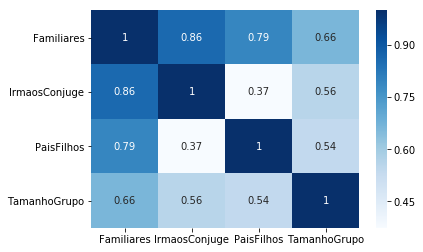

In [111]:
sns.heatmap(data[['Familiares', 'IrmaosConjuge', 'PaisFilhos', 'TamanhoGrupo']].corr(), annot=True, cmap='Blues')
plt.show()

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

In [112]:
solo = data['Familiares']==0

In [113]:
data['Solo'] = solo.map({True: 1, False: 0})

In [114]:
data.shape

(1309, 24)

### Atualizar train e test 

In [115]:
train = data.loc[train.index]

In [116]:
train.shape

(891, 24)

In [117]:
test = data.loc[test.index]

In [118]:
test.shape

(418, 24)

In [119]:
test.drop('Sobreviveu', axis=1, inplace=True)

In [120]:
test.isnull().sum()

Tarifa                          0
PaisFilhos                      0
IrmaosConjuge                   0
TamanhoGrupo                    0
SobrevivenciaGrupo              0
Classe_2                        0
Classe_3                        0
Embarque_Q                      0
Embarque_S                      0
Titulo_HomemAdulto              0
Titulo_Menino                   0
Titulo_Outros                   0
Titulo_Solteira                 0
ExpectativaDeVida_morrer        0
ExpectativaDeVida_sobreviver    0
Sexo_mulher                     0
Idade                           0
FaixaEtaria_(16.0, 32.0]        0
FaixaEtaria_(32.0, 48.0]        0
FaixaEtaria_(48.0, 64.0]        0
FaixaEtaria_(64.0, 80.0]        0
Familiares                      0
Solo                            0
dtype: int64

In [121]:
train.isnull().sum()

Tarifa                          0
PaisFilhos                      0
IrmaosConjuge                   0
Sobreviveu                      0
TamanhoGrupo                    0
SobrevivenciaGrupo              0
Classe_2                        0
Classe_3                        0
Embarque_Q                      0
Embarque_S                      0
Titulo_HomemAdulto              0
Titulo_Menino                   0
Titulo_Outros                   0
Titulo_Solteira                 0
ExpectativaDeVida_morrer        0
ExpectativaDeVida_sobreviver    0
Sexo_mulher                     0
Idade                           0
FaixaEtaria_(16.0, 32.0]        0
FaixaEtaria_(32.0, 48.0]        0
FaixaEtaria_(48.0, 64.0]        0
FaixaEtaria_(64.0, 80.0]        0
Familiares                      0
Solo                            0
dtype: int64

### Utilização train para treinar o modelo

In [122]:
X = train.drop('Sobreviveu', axis=1)

In [123]:
y = train['Sobreviveu']

In [124]:
X.shape, y.shape

((891, 23), (891,))

### Escolher colunas

In [125]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_sobreviver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Solo'],
      dtype='object')

In [126]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
               'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
               'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
               'Titulo_Solteira', 'ExpectativaDeVida_morrer',
               'ExpectativaDeVida_sobreviver', 'Sexo_mulher', 'Idade',
               'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
               'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
               'Solo']

In [127]:
X = X[recursos]

### Averiguando Shapes 

In [128]:
X.shape, y.shape

((891, 23), (891,))

### Importar train_test_split para dividir e preparar para treino

In [129]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
X_train.shape, y_train.shape

((623, 23), (623,))

In [132]:
X_test.shape, y_test.shape

((268, 23), (268,))

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [133]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [135]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [136]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [137]:
resultados = []

for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinamento do modelo
    x.fit(X_train, y_train)
    
    # predição do modelo
    x_pred = x.predict(X_test)
    
    # score do modelo
    acuracidade = round(x.score(X_test, y_test)*100,2)
    
    resultados.append({'nome': model['nome'],
                        'score': acuracidade,
                          'predições': x_pred})

<a name="ranking"></a>

### Ranking de Modelos Por Score

<br>

[início](#topo)

In [138]:
models = pd.DataFrame(resultados)

In [139]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
8,LinearSVC,90.30
0,logreg,89.55
3,adaboost,89.55
11,RForest,88.81
2,gradboost,88.43
1,etree,85.07
10,Dtree,84.70
6,GaussianNB,82.46
4,SVC,78.73
5,KNN,74.25


<a name="cv"></a>

### Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [140]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [141]:
kfold = KFold(n_splits=10, random_state=123)

In [142]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [143]:
resultado = cross_val_score(ada, X_train, y_train, cv=kfold, scoring='accuracy')

print('O score cross-validado do AdaBoost é:', resultado.mean())

O score cross-validado do AdaBoost é: 0.8924219150025602


In [144]:
resultado

array([0.9047619 , 0.84126984, 0.95238095, 0.93548387, 0.82258065,
       0.82258065, 0.90322581, 0.90322581, 0.90322581, 0.93548387])

In [145]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=200, random_state=123)

In [146]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

In [147]:
from sklearn.metrics import confusion_matrix

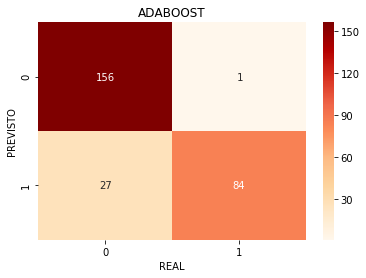

In [148]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('ADABOOST')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [149]:
from sklearn.metrics import(recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score)

### Revocação

In [150]:
recall_score(y_test, ada_pred)

0.7567567567567568

### Acuracidade

In [151]:
accuracy_score(y_test, ada_pred)

0.8955223880597015

### Precisão

In [152]:
precision_score(y_test, ada_pred)

0.9882352941176471

### F1-Score

In [153]:
f1_score(y_test, ada_pred)

0.8571428571428572

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Selecionando Threshold (Limite)

In [155]:
ns_probs = [0 for _ in range(len(y_test))] # no skill

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

ada_auc = roc_auc_score(y_test, ada_probs)



Sem habilidade: ROC AUC=0.500
AdaBoost: ROC AUC=0.943


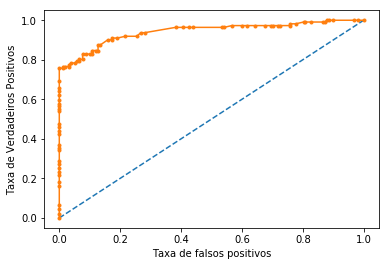

In [156]:
print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('AdaBoost: ROC AUC=%.3f' %(ada_auc))

ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='Adaboost')

plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

plt.show()

In [175]:
pred_proba = ada_probs >= 0.6

In [176]:
pred_proba = pd.Series(pred_proba).map({False: 0, True: 1}).values
pred_proba

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

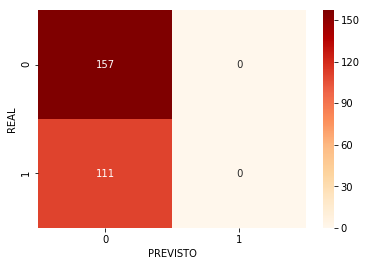

In [177]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='2.0f')
plt.xlabel('PREVISTO')
plt.ylabel('REAL')
plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [158]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [159]:
from sklearn.ensemble import BaggingClassifier

* #### Ensacamento DecisionTree


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

* ### Configurando Hyper-Parâmetros para o AdaBoost

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)